# Individual Plan
## Importing Data

+ Imported Players
+ Imported Sessions

[gitHub link:](https://github.com/burgerchae/DSCI100-Project-Individual-)

https://github.com/burgerchae/DSCI100-Project-Individual-

## Load package and import data

In [1]:
library(tidyverse)
url = 'https://drive.google.com/uc?export=download&id=13vWD5kG6mLHxRaxWOSoxvUXCdmhDwD97'

players<- read_csv(url)
dim(players); head(players)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 196   7

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [2]:
distinct(players, experience)
distinct(players, subscribe)
distinct(players, gender)
players |>summarize(max(played_hours), min(played_hours), max(Age), min(Age))

experience
<chr>
Pro
Veteran
Amateur
Regular
Beginner


subscribe
<lgl>
TRUE
FALSE


gender
<chr>
Male
Female
Non-binary
Prefer not to say
Agender
Two-Spirited
Other


max(played_hours),min(played_hours),max(Age),min(Age)
<dbl>,<dbl>,<dbl>,<dbl>
223.1,0,NA,NA


## Data Description

There are 196 observations and 7 variables, the variables are:
+ Experience(character): which describes the experiecne level of the players, as: Pro, Veteran, Amateur, Ruglar, and Beginner.
+ Subscribe (logical): which describes whether or not the player has subscribed the game info, as: TRUE and FALSE.
+ hashedEmail(character): which records the hashing encoded email adresses of players.
+ Played_hours(double character): which records the game playtime in hours, with a range from 0 to 99.
+ Name(characters): which records the players' name.
+ Gender(character): which records the players' gender.
+ Age(double integer): which describes the player's age.
+ IndividualId(logical):
+ OrganizationName(logical):

### Potential Issues

In [10]:
players |> group_by(gender) |> summarize(count=n())

gender,count
<chr>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11
Two-Spirited,6


1. We cannot understand the hased email address, this column might be useless
2. If we want to used experience as a predictor, it is not numerical, we need to process it first, one-hot encoding is an option.
3. The quantities of Agender, Other, and Two-Spirited are very small compared to Male and Female. Maybe we can merge them if we want to use gender as the response variable or as the predictor.

## Data Visualization

ERROR while rich displaying an object: Error in `geom_bar()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'subscirbe' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handle

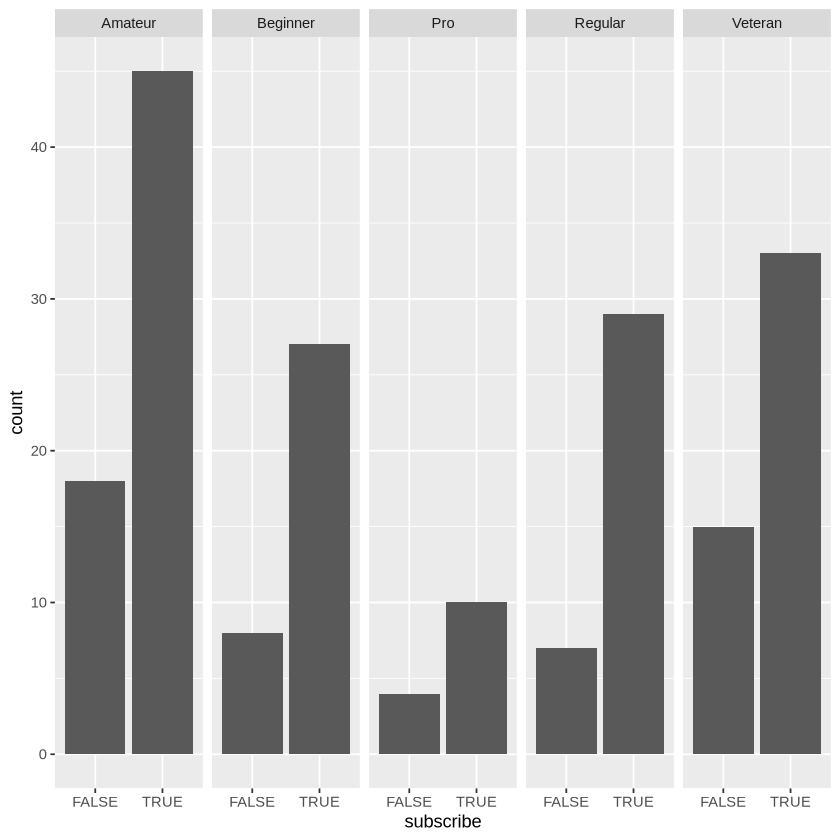

In [3]:
ggplot(players, aes(x=subscribe)) + geom_bar() + facet_grid(cols = vars(experience))
ggplot(players, aes(x=subscirbe)) + geom_bar(aes(fill=experience), position="dodge")